In [1]:
!pip install torch==2.3.0 torchtext==0.18.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 779.1/779.1 MB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 80.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 57.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 16.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 39.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 15.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.2/176.2 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9

In [2]:
!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 472.7/472.7 kB 16.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 11.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 13.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 18.7 MB/s eta 0:00:00


In [3]:
import collections
import datasets
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torchtext
import tqdm

In [4]:
train_data,test_data=datasets.load_dataset("imdb",split=["train","test"])

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/7.81k [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/21.0M [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/20.5M [00:00<?, ?B/s]

unsupervised-00000-of-00001.parquet:   0%|          | 0.00/42.0M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating unsupervised split:   0%|          | 0/50000 [00:00<?, ? examples/s]

In [5]:
from torchtext.data import get_tokenizer

/usr/local/lib/python3.10/dist-packages/torchtext/data/__init__.py:4: UserWarning: 
/!\ IMPORTANT WARNING ABOUT TORCHTEXT STATUS /!\ 
Torchtext is deprecated and the last released version will be 0.18 (this one). You can silence this warning by calling the following at the beginnign of your scripts: `import torchtext; torchtext.disable_torchtext_deprecation_warning()`
  warnings.warn(torchtext._TORCHTEXT_DEPRECATION_MSG)


In [6]:
tokenizer=get_tokenizer("basic_english")

In [7]:
def tokenize_example(example,tokenizer,max_length):
  tokens=tokenizer(example["text"])[:max_length]
  length=len(tokens)
  return {"tokens":tokens,"length":length}

In [8]:
max_length=256
train_data=train_data.map(
    tokenize_example,fn_kwargs={"tokenizer":tokenizer,"max_length":max_length}
)
test_data=test_data.map(tokenize_example,fn_kwargs={"tokenizer":tokenizer,"max_length":max_length})

Map:   0%|          | 0/25000 [00:00<?, ? examples/s]

Map:   0%|          | 0/25000 [00:00<?, ? examples/s]

**validation data**

In [9]:
test_size=0.25
train_valid_data=train_data.train_test_split(test_size=test_size)
train_data=train_valid_data["train"]
valid_data=train_valid_data["test"]

In [10]:
train_data

Dataset({
    features: ['text', 'label', 'tokens', 'length'],
    num_rows: 18750
})

In [11]:
test_data

Dataset({
    features: ['text', 'label', 'tokens', 'length'],
    num_rows: 25000
})

In [12]:
valid_data

Dataset({
    features: ['text', 'label', 'tokens', 'length'],
    num_rows: 6250
})

**Vocaubulary**

In [13]:
from torchtext.vocab import build_vocab_from_iterator

/usr/local/lib/python3.10/dist-packages/torchtext/vocab/__init__.py:4: UserWarning: 
/!\ IMPORTANT WARNING ABOUT TORCHTEXT STATUS /!\ 
Torchtext is deprecated and the last released version will be 0.18 (this one). You can silence this warning by calling the following at the beginnign of your scripts: `import torchtext; torchtext.disable_torchtext_deprecation_warning()`
  warnings.warn(torchtext._TORCHTEXT_DEPRECATION_MSG)
/usr/local/lib/python3.10/dist-packages/torchtext/utils.py:4: UserWarning: 
/!\ IMPORTANT WARNING ABOUT TORCHTEXT STATUS /!\ 
Torchtext is deprecated and the last released version will be 0.18 (this one). You can silence this warning by calling the following at the beginnign of your scripts: `import torchtext; torchtext.disable_torchtext_deprecation_warning()`
  warnings.warn(torchtext._TORCHTEXT_DEPRECATION_MSG)


In [14]:
min_freq = 5
special_tokens = ["<unk>", "<pad>"]

vocab = build_vocab_from_iterator(
    train_data["tokens"],
    min_freq=min_freq,
    specials=special_tokens,
)

In [15]:
len(vocab)

21486

In [16]:
unk_index=vocab["<unk>"]
pad_index=vocab["<pad>"]

In [17]:
vocab.set_default_index(unk_index)

**numericalizing our data**

In [18]:
def numericalize_example(example,vocab):
  ids=vocab.lookup_indices(example["tokens"])
  return {"ids":ids}

In [19]:
train_data = train_data.map(numericalize_example, fn_kwargs={"vocab": vocab})
valid_data = valid_data.map(numericalize_example, fn_kwargs={"vocab": vocab})
test_data = test_data.map(numericalize_example, fn_kwargs={"vocab": vocab})

Map:   0%|          | 0/18750 [00:00<?, ? examples/s]

Map:   0%|          | 0/6250 [00:00<?, ? examples/s]

Map:   0%|          | 0/25000 [00:00<?, ? examples/s]

**converting into tensors**

In [20]:
train_data=train_data.with_format(type="torch",columns={"ids","label","length"})
valid_data=valid_data.with_format(type="torch",columns={"ids","label","length"})
test_data=valid_data.with_format(type="torch",columns={"ids","label","length"})

In [21]:
train_data[0]

{'label': tensor(1),
 'length': tensor(218),
 'ids': tensor([   12,     9,   253,   118,     8,   215,  6093,     5,  2078,   700,
            22,     2,   122,  1005,   394,    44,     0,     8,   708,     3,
          3098,     9,    16,  2076,     3,    39,  1638,     2,   122,     8,
          2106,  3580,    38,   994,  4323,  1745,     3,   146,     3,     4,
           108,   623,    19,     2,   204,   571,     3,   128,   147,    31,
            87,    26,     0,    13,     2,    81,   298,     3,    12,    17,
             5, 12349,    13,   317,   365,     6,   375,     2,   401,   593,
            36,    11,    17,    81,    70,   461,   607,   251,    26,  5848,
             3,  3098,    72,   636,   734,    20,  2106,  3580,     3,    79,
           809,    21,   104,   509,   363,  7355,  2713,     4,     0,     4,
             6, 13944, 12635,    13,  8927,     7,     9,  7754,     3,  6093,
           147,    31,    87,     5,   668,     3,  5182,  7877, 11873,     8,


**dataloaders**

In [22]:
def get_collate_fn(pad_index):
    def collate_fn(batch):
        batch_ids = [i["ids"] for i in batch]
        batch_ids = nn.utils.rnn.pad_sequence(
            batch_ids, padding_value=pad_index, batch_first=True
        )
        batch_length = [i["length"] for i in batch]
        batch_length = torch.stack(batch_length)
        batch_label = [i["label"] for i in batch]
        batch_label = torch.stack(batch_label)
        batch = {"ids": batch_ids, "length": batch_length, "label": batch_label}
        return batch

    return collate_fn

In [23]:
def get_data_loader(dataset, batch_size, pad_index, shuffle=False):
    collate_fn = get_collate_fn(pad_index)
    data_loader = torch.utils.data.DataLoader(
        dataset=dataset,
        batch_size=batch_size,
        collate_fn=collate_fn,
        shuffle=shuffle,
    )
    return data_loader

In [24]:
batch_size=512
train_data_loader=get_data_loader(train_data,batch_size,pad_index,shuffle=True)
valid_data_loader=get_data_loader(valid_data,batch_size,pad_index)
test_data_loader=get_data_loader(test_data,batch_size,pad_index)

In [25]:
len(train_data_loader)

37

**Model**

In [26]:
class LSTM(nn.Module):
  def __init__(self,vocab_size,embedding_dim,hidden_dim,output_dim,n_layers,bidirectional,dropout_rate,pad_index):
    super().__init__()
    self.embedding=nn.Embedding(vocab_size,embedding_dim,padding_idx=pad_index)
    self.lstm=nn.LSTM(embedding_dim,hidden_dim,n_layers,bidirectional=bidirectional,dropout=dropout_rate,batch_first=True)
    self.fc=nn.Linear(hidden_dim * 2 if bidirectional else hidden_dim,output_dim)
    self.dropout=nn.Dropout(dropout_rate)

  def forward(self,ids,length):
    embedded=self.dropout(self.embedding(ids))
    packed_embedded=nn.utils.rnn.pack_padded_sequence(embedded,length,batch_first=True,enforce_sorted=False)
    packed_output,(hidden,cell)=self.lstm(packed_embedded)
    output,output_length=nn.utils.rnn.pad_packed_sequence(packed_output)
    if self.lstm.bidirectional:
      hidden=self.dropout(torch.cat([hidden[-1], hidden[-2]],dim=-1))

    else:
      hidden=self.dropout(hidden[-1])

    prediction=self.fc(hidden)
    return prediction

In [27]:
vocab_size=len(vocab)
embedding_dim=300
hidden_dim=300
output_dim=len(train_data.unique("label"))
n_layers=2
bidirectional=True
dropout_rate=0.5
model=LSTM(vocab_size,embedding_dim,hidden_dim,output_dim,n_layers,bidirectional,dropout_rate,pad_index)

In [28]:
def count_parameters(model):
  return  sum(p.numel() for p in model.parameters() if p.requires_grad)

print(f"the model has {count_parameters(model):,} trainable parameters")

the model has 10,056,602 trainable parameters


In [29]:
def initialize_weights(m):
  if isinstance(m,nn.Linear):
    nn.init.xavier_normal_(m.weight)
    nn.init.zeros_(m.bias)
  elif isinstance(m,nn.LSTM):
    for name,param in m.named_parameters():
      if "bias" in name:
        nn.init.zeros_(param)
      elif "weight" in  name:
        nn.init.orthogonal_(param)

In [30]:
model.apply(initialize_weights)

LSTM(
  (embedding): Embedding(21486, 300, padding_idx=1)
  (lstm): LSTM(300, 300, num_layers=2, batch_first=True, dropout=0.5, bidirectional=True)
  (fc): Linear(in_features=600, out_features=2, bias=True)
  (dropout): Dropout(p=0.5, inplace=False)
)

In [31]:
vectors=torchtext.vocab.GloVe()

.vector_cache/glove.840B.300d.zip: 2.18GB [07:00, 5.17MB/s]                            
100%|█████████▉| 2196016/2196017 [04:55<00:00, 7441.38it/s]


In [32]:
pretrained_embedding = vectors.get_vecs_by_tokens(vocab.get_itos())

In [33]:
model.embedding.weight.data = pretrained_embedding


In [34]:
lr = 5e-4

optimizer = optim.Adam(model.parameters(), lr=lr)

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

In [35]:
criterion = nn.CrossEntropyLoss()

In [36]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

device

device(type='cuda')

In [37]:
model = model.to(device)
criterion = criterion.to(device)

In [38]:
def train(dataloader, model, criterion, optimizer, device):
    model.train()
    epoch_losses = []
    epoch_accs = []
    for batch in tqdm.tqdm(dataloader, desc="training..."):
        ids = batch["ids"].to(device)
        length = batch["length"]
        label = batch["label"].to(device)
        prediction = model(ids, length)
        loss = criterion(prediction, label)
        accuracy = get_accuracy(prediction, label)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        epoch_losses.append(loss.item())
        epoch_accs.append(accuracy.item())
    return np.mean(epoch_losses), np.mean(epoch_accs)

In [39]:
def evaluate(dataloader, model, criterion, device):
    model.eval()
    epoch_losses = []
    epoch_accs = []
    with torch.no_grad():
        for batch in tqdm.tqdm(dataloader, desc="evaluating..."):
            ids = batch["ids"].to(device)
            length = batch["length"]
            label = batch["label"].to(device)
            prediction = model(ids, length)
            loss = criterion(prediction, label)
            accuracy = get_accuracy(prediction, label)
            epoch_losses.append(loss.item())
            epoch_accs.append(accuracy.item())
    return np.mean(epoch_losses), np.mean(epoch_accs)

In [40]:
def get_accuracy(prediction, label):
    batch_size, _ = prediction.shape
    predicted_classes = prediction.argmax(dim=-1)
    correct_predictions = predicted_classes.eq(label).sum()
    accuracy = correct_predictions / batch_size
    return accuracy

In [41]:
n_epochs = 10
best_valid_loss = float("inf")

metrics = collections.defaultdict(list)

for epoch in range(n_epochs):
    train_loss, train_acc = train(
        train_data_loader, model, criterion, optimizer, device
    )
    valid_loss, valid_acc = evaluate(valid_data_loader, model, criterion, device)
    metrics["train_losses"].append(train_loss)
    metrics["train_accs"].append(train_acc)
    metrics["valid_losses"].append(valid_loss)
    metrics["valid_accs"].append(valid_acc)
    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        torch.save(model.state_dict(), "lstm.pt")
    print(f"epoch: {epoch}")
    print(f"train_loss: {train_loss:.3f}, train_acc: {train_acc:.3f}")
    print(f"valid_loss: {valid_loss:.3f}, valid_acc: {valid_acc:.3f}")

evaluating...: 100%|██████████| 13/13 [00:03<00:00,  3.74it/s]


epoch: 0
train_loss: 0.629, train_acc: 0.629
valid_loss: 0.565, valid_acc: 0.696


evaluating...: 100%|██████████| 13/13 [00:03<00:00,  3.86it/s]


epoch: 1
train_loss: 0.463, train_acc: 0.780
valid_loss: 0.443, valid_acc: 0.811


evaluating...: 100%|██████████| 13/13 [00:03<00:00,  3.58it/s]


epoch: 2
train_loss: 0.385, train_acc: 0.828
valid_loss: 0.408, valid_acc: 0.809


evaluating...: 100%|██████████| 13/13 [00:03<00:00,  3.60it/s]


epoch: 3
train_loss: 0.364, train_acc: 0.844
valid_loss: 0.374, valid_acc: 0.836


evaluating...: 100%|██████████| 13/13 [00:03<00:00,  3.51it/s]


epoch: 4
train_loss: 0.317, train_acc: 0.868
valid_loss: 0.332, valid_acc: 0.866


evaluating...: 100%|██████████| 13/13 [00:03<00:00,  3.56it/s]


epoch: 5
train_loss: 0.285, train_acc: 0.886
valid_loss: 0.325, valid_acc: 0.876


evaluating...: 100%|██████████| 13/13 [00:03<00:00,  3.52it/s]


epoch: 6
train_loss: 0.274, train_acc: 0.888
valid_loss: 0.352, valid_acc: 0.863


evaluating...: 100%|██████████| 13/13 [00:03<00:00,  3.44it/s]


epoch: 7
train_loss: 0.253, train_acc: 0.898
valid_loss: 0.303, valid_acc: 0.876


evaluating...: 100%|██████████| 13/13 [00:03<00:00,  3.42it/s]


epoch: 8
train_loss: 0.240, train_acc: 0.903
valid_loss: 0.305, valid_acc: 0.883


evaluating...: 100%|██████████| 13/13 [00:03<00:00,  3.46it/s]

epoch: 9
train_loss: 0.205, train_acc: 0.920
valid_loss: 0.308, valid_acc: 0.880


In [41]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(1, 1, 1)
ax.plot(metrics["train_losses"], label="train loss")
ax.plot(metrics["valid_losses"], label="valid loss")
ax.set_xlabel("epoch")
ax.set_ylabel("loss")
ax.set_xticks(range(n_epochs))
ax.legend()
ax.grid()

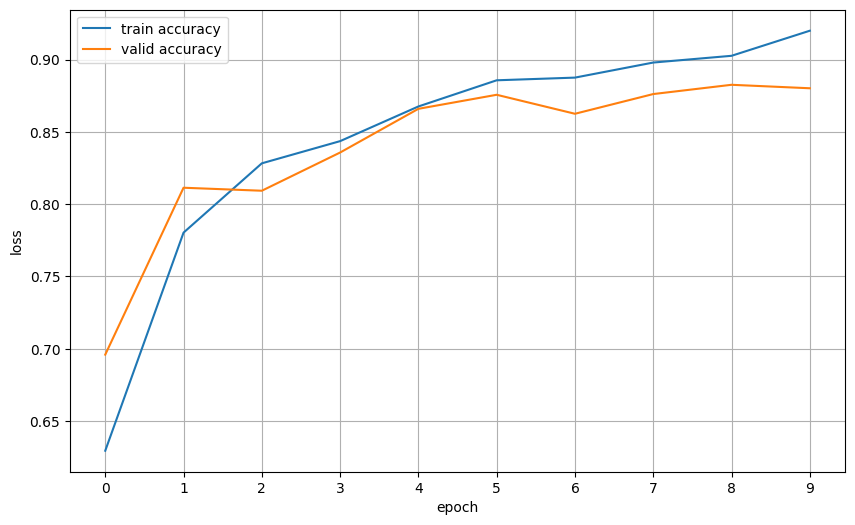

In [42]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(1, 1, 1)
ax.plot(metrics["train_accs"], label="train accuracy")
ax.plot(metrics["valid_accs"], label="valid accuracy")
ax.set_xlabel("epoch")
ax.set_ylabel("loss")
ax.set_xticks(range(n_epochs))
ax.legend()
ax.grid()

In [43]:
model.load_state_dict(torch.load("lstm.pt"))

test_loss, test_acc = evaluate(test_data_loader, model, criterion, device)

evaluating...: 100%|██████████| 13/13 [00:03<00:00,  3.36it/s]


In [44]:
print(f"test_loss: {test_loss:.3f}, test_acc: {test_acc:.3f}")

test_loss: 0.303, test_acc: 0.876


In [45]:
def predict_sentiment(text, model, tokenizer, vocab, device):
    tokens = tokenizer(text)
    ids = vocab.lookup_indices(tokens)
    length = torch.LongTensor([len(ids)])
    tensor = torch.LongTensor(ids).unsqueeze(dim=0).to(device)
    prediction = model(tensor, length).squeeze(dim=0)
    probability = torch.softmax(prediction, dim=-1)
    predicted_class = prediction.argmax(dim=-1).item()
    predicted_probability = probability[predicted_class].item()
    return predicted_class, predicted_probability

In [46]:
text = "This film is terrible!"

predict_sentiment(text, model, tokenizer, vocab, device)

(0, 0.9248704314231873)

In [47]:
text = "This film is great!"

predict_sentiment(text, model, tokenizer, vocab, device)

(1, 0.9320554137229919)

In [48]:
text = "This film is not terrible, it's great!"

predict_sentiment(text, model, tokenizer, vocab, device)

(0, 0.5339257717132568)

In [49]:
text = "This film is not great, it's terrible!"

predict_sentiment(text, model, tokenizer, vocab, device)

(0, 0.5874021649360657)